In [12]:
# ייבוא ספריות והגדרות מסודרות לעבודה שלי של חן ורעות
# לא לגעת בזה 
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats  # למבחנים סטטיסטיים שונים (t-test, חי בריבוע, ANOVA ועוד)
import statsmodels.api as sm  # לרגרסיה לוגיסטית ומבחנים נוספים
import statsmodels.formula.api as smf  # לרגרסיה מבוססת נוסחאות





"""
 כללי עבודה:
1. כל פקודה תעובד בנפרד בשלב הראשון, כך נוכל לבדוק אם יש שגיאות בודדות ולטפל בהן.
2. בסוף, אחרי שכל הפקודות נבדקו והן פועלות בצורה תקינה, נריץ את כל הפקודות יחד.
# זה חשוב לוודא שהקוד עובד כמו שצריך ולמנוע בעיות לא צפויות בריצה הגדולה
"""

"""
מה הספקנו עד עכשיו:
1. הגדרת נתיב לשאיבת הנתונים של הקובץ המקורי
2. ניקוי כל השורות האחרונות והמיותרות
3. בדיקה של ערכים חסרים בכל עמודה
"""

"""
תכונות מעניינות שלמדנו:
1. במידה ושמים נקודה פסיק  בסוף פקודה היא לא תרוץ
2. קיצור להרצת הקוד - שיפט ואנטר ביחד
3. קיצור לצפייה בהוראות הפקודה - שיפט וטאב ביחד
"""

# קביעת הנתיב של תיקיית העבודה הנוכחית
project_root = os.getcwd()
input_file = os.path.join(project_root,"Update 1 - Gender","df_with_readmission_count_fixed.xlsx")

In [13]:


# קריאה לקובץ האקסל
df = pd.read_excel(input_file)



In [23]:
import pandas as pd
import os

# קביעת הנתיב של תיקיית העבודה הנוכחית
project_root = os.getcwd()
input_file = os.path.join(project_root, "Update 1 - Gender", "df_with_readmission_count_fixed.xlsx")

# קריאה לקובץ האקסל
df = pd.read_excel(input_file)

# ספירת מספר המטופלים הייחודיים
num_unique_patients = df["מספר מטופל רנדומלי"].nunique()
print(f"מספר המטופלים הייחודיים: {num_unique_patients}")

מספר המטופלים הייחודיים: 4162


C:\Users\hadma\AppData\Local\Temp\ipykernel_10440\3998175771.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="נקבה", y="גיל אשפוז", data=df_unique, palette=["#1f77b4", "#ff69b4"], inner="quart")


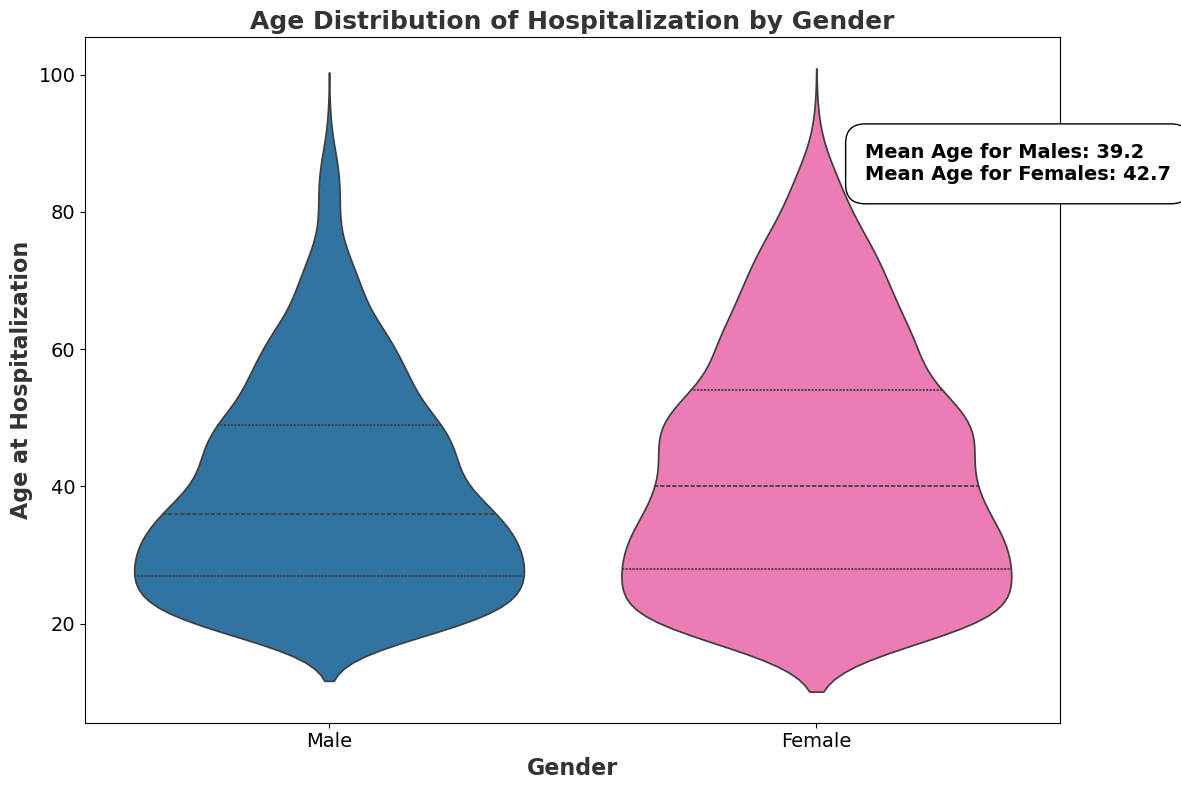

('C:\\Users\\hadma\\Desktop\\git\\DataFinalProjectDegree\\final_project\\Statistical tests_Updates\\Update 1 - Gender\\TTest_Gender_Age\\Mann_Whitney_Test_Results_Gender_Age.txt',
 'C:\\Users\\hadma\\Desktop\\git\\DataFinalProjectDegree\\final_project\\Statistical tests_Updates\\Update 1 - Gender\\TTest_Gender_Age\\mann_whitney_gender_age_violin_plot_with_mean_positioned.png')

In [16]:
# מבחן סטטסיטי לבדיקת הקשר בין המגדרים לגיל שלהם ומסקנות לגבי אשפוזים חוזרים
# קריאה לקובץ האקסל
df = pd.read_excel(input_file)

# הסרת כפילויות לפי "מספר מטופל רנדומלי" כדי להבטיח שכל מטופל ייספר פעם אחת בלבד
df_unique = df.drop_duplicates(subset='מספר מטופל רנדומלי')

# יצירת תיקייה לשמירת התוצאות
ttest_gender_age_dir = os.path.join(project_root, "Update 1 - Gender", "Mann_Whitney_Test_Gender_vs_Age")
os.makedirs(ttest_gender_age_dir, exist_ok=True)

# פילוח הנתונים לפי מגדר
males_age = df_unique[df_unique['נקבה'] == 0]['גיל אשפוז']
females_age = df_unique[df_unique['נקבה'] == 1]['גיל אשפוז']

# ביצוע מבחן Mann-Whitney U
u_stat, p_value_mann_whitney = stats.mannwhitneyu(males_age, females_age)

# חישוב הגיל הממוצע עבור גברים ונשים
mean_males_age = males_age.mean()
mean_females_age = females_age.mean()

# יצירת גרף Violin Plot מקצועי עם הגיל הממוצע
plt.figure(figsize=(12, 8))

# יצירת הגרף Violin Plot
sns.violinplot(x="נקבה", y="גיל אשפוז", data=df_unique, palette=["#1f77b4", "#ff69b4"], inner="quart")

# כותרת לגרף
plt.title("Age Distribution of Hospitalization by Gender", fontsize=18, fontweight="bold", color="#333333")
plt.xlabel("Gender", fontsize=16, fontweight="bold", color="#333333")
plt.ylabel("Age at Hospitalization", fontsize=16, fontweight="bold", color="#333333")

# הוספת תוויות צבעוניות
plt.xticks([0, 1], ['Male', 'Female'], fontsize=14)
plt.yticks(fontsize=14)

# הוספת הגיל הממוצע בצד ימין למעלה ליד הכותרת
plt.text(1.1, 90, f"Mean Age for Males: {mean_males_age:.1f}\nMean Age for Females: {mean_females_age:.1f}",
         ha='left', va='top', fontsize=14, color='black', fontweight='bold', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))

# שמירת הגרף
mann_whitney_graph_path_violin_with_mean = os.path.join(ttest_gender_age_dir, "mann_whitney_gender_age_violin_plot_with_mean_positioned.png")
plt.tight_layout()
plt.savefig(mann_whitney_graph_path_violin_with_mean, format='png')
plt.show()

# יצירת קובץ טקסט עם תוצאות המבחן Mann-Whitney U
mann_whitney_results = f"""
Mann-Whitney U Test Results for Gender vs Age:

U-Statistic: {u_stat:.2f}
P-Value: {p_value_mann_whitney:.3f}

Conclusion:
- If p-value < 0.05, there is a significant difference between male and female ages at the time of hospitalization.
- If p-value >= 0.05, there is no significant difference between the groups.

**Specific Findings:**
- The mean age for **Males** at the time of hospitalization: **{mean_males_age:.1f}**
- The mean age for **Females** at the time of hospitalization: **{mean_females_age:.1f}**
"""

# שמירת התוצאות בקובץ טקסט בתיקייה המתאימה
mann_whitney_results_path_text = os.path.join(ttest_gender_age_dir, "Mann_Whitney_Test_Results_Gender_Age.txt")
with open(mann_whitney_results_path_text, "w") as file:
    file.write(mann_whitney_results)

# הצגת נתיב הקובץ ששמרנו
mann_whitney_results_path_text, mann_whitney_graph_path_violin_with_mean


In [21]:
#מבחן בין הקשר של מין המופל לחזרה לאשפוז 
#9/2

import pandas as pd
import scipy.stats as stats

# קבלת התיקייה שבה הקובץ רץ, גם ב-Jupyter Notebook
project_root = os.getcwd()


# קריאת הנתונים מהקובץ המעודכן
input_file = os.path.join(project_root,"Update 1 - Gender","df_with_readmission_count_fixed.xlsx")
df = pd.read_excel(input_file)

# יצירת טבלת שכיחות בין מין המטופל לבין אשפוז חוזר
contingency_table = pd.crosstab(df['נקבה'], df['מספר אשפוז חוזר'] > 0)  # 0 = לא חזר, 1+ = חזר

# ביצוע מבחן חי בריבוע
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# הצגת התוצאות
print("🔹 מבחן חי בריבוע: בדיקת קשר בין מין המטופל לאשפוז חוזר")
print(f"סטטיסטיקת חי בריבוע: {chi2:.4f}")
print(f"דרגות חופש: {dof}")
print(f"ערך p: {p:.4f}")

# בדיקת מובהקות
if p < 0.05:
    print("✅ קיים קשר מובהק בין מין המטופל לבין חזרה לאשפוז (p < 0.05)")
else:
    print("❌ לא נמצא קשר מובהק בין מין המטופל לבין חזרה לאשפוז (p >= 0.05)")


🔹 מבחן חי בריבוע: בדיקת קשר בין מין המטופל לאשפוז חוזר
סטטיסטיקת חי בריבוע: 3.6623
דרגות חופש: 1
ערך p: 0.0557
❌ לא נמצא קשר מובהק בין מין המטופל לבין חזרה לאשפוז (p >= 0.05)


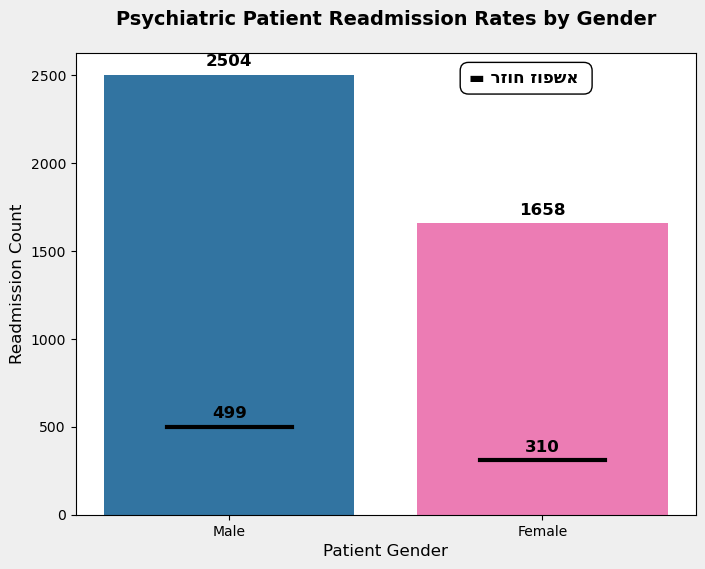

In [45]:
#"האם יש קשר בין מגדר המטופל לבין הסבירות לחזור לאשפוז?"
# קביעת הנתיב של תיקיית העבודה הנוכחית
project_root = os.getcwd()
output_dir = os.path.join(project_root, "Statistical tests_Updates", "Gender_vs_Readmission")
os.makedirs(output_dir, exist_ok=True)
input_file = os.path.join(project_root, "Update 1 - Gender", "df_with_readmission_count_fixed.xlsx")

# קריאה לקובץ האקסל
df = pd.read_excel(input_file)

# יצירת עמודה לזיהוי מטופלים שחזרו לאשפוז
patients_readmission = df.groupby("מספר מטופל רנדומלי")["מספר אשפוז חוזר"].max().reset_index()
patients_readmission["אשפוז חוזר"] = patients_readmission["מספר אשפוז חוזר"].apply(lambda x: 1 if x > 1 else 0)

# מיזוג הנתונים עם מידע על מגדר
patients_data = df.drop_duplicates(subset="מספר מטופל רנדומלי")[["מספר מטופל רנדומלי", "נקבה"]]
df_merged = patients_readmission.merge(patients_data, on="מספר מטופל רנדומלי")

# יצירת טבלת שכיחות למבחן חי-בריבוע
contingency_table = pd.crosstab(df_merged["נקבה"], df_merged["אשפוז חוזר"])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# שמירת הנתונים היבשים לקובץ טקסט
results_text = f"טבלת שכיחות:\n{contingency_table}\n\nמבחן חי-בריבוע:\n" \
               f"סטטיסטיקת חי-בריבוע: {chi2:.2f}\np-Value: {p_value:.5f}\n"
if p_value < 0.05:
    results_text += "יש קשר מובהק בין מין המטופל לבין הסבירות לאשפוז חוזר."
else:
    results_text += "אין קשר מובהק בין מין המטופל לבין הסבירות לאשפוז חוזר."

with open(os.path.join(output_dir, "Gender_vs_Readmission_Stats.txt"), "w", encoding="utf-8") as f:
    f.write(results_text)

# יצירת גרף עם סימון של כמות האשפוזים החוזרים
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=["Male", "Female"], y=contingency_table.sum(axis=1), palette=["#1f77b4", "#ff69b4"])

# הוספת קווים שחורים שמייצגים את כמות האשפוזים החוזרים
for i, (total, readmit) in enumerate(zip(contingency_table.sum(axis=1), contingency_table[1])):
    plt.text(i, total + 50, f"{total}", ha='center', fontsize=12, fontweight='bold')
    plt.text(i, readmit + 50, f"{readmit}", ha='center', fontsize=12, fontweight='bold', color='black')
    plt.plot([i - 0.2, i + 0.2], [readmit, readmit], color='black', linewidth=3)

# הוספת מקרא שמציין שהקו מסמל אשפוז חוזר בפינה הימנית העליונה
plt.figtext(0.76, 0.83, "▬ רזוח זופשא ", fontsize=12, fontweight='bold', color='black', ha='right', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# הוספת כותרות
plt.title("Psychiatric Patient Readmission Rates by Gender", fontsize=14, fontweight='bold', pad=20)
plt.xlabel("Patient Gender", fontsize=12)
plt.ylabel("Readmission Count", fontsize=12)

# שינוי צבע הרקע של הגרף
plt.gcf().set_facecolor('#efefef')

# שמירת הגרף
graph_path = os.path.join(output_dir, "Gender_vs_Readmission_BarChart.png")
plt.savefig(graph_path, format='png', bbox_inches='tight')
plt.show()

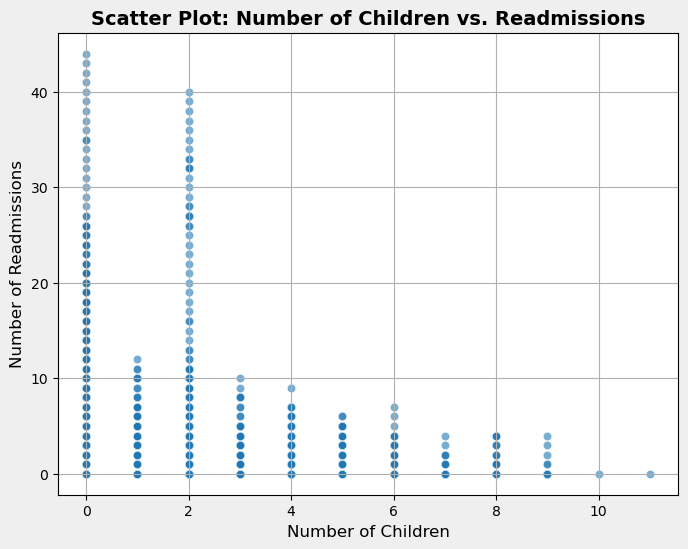

In [49]:
# קביעת הנתיב של תיקיית העבודה הנוכחית
project_root = os.getcwd()
output_dir = os.path.join(project_root, "Statistical tests_Updates", "Children_vs_Readmission")
os.makedirs(output_dir, exist_ok=True)
input_file = os.path.join(project_root, "Update 1 - Gender", "df_with_readmission_count_fixed.xlsx")

# קריאה לקובץ האקסל
df = pd.read_excel(input_file)

# בדיקת נתונים חסרים
df = df.dropna(subset=["מספר ילדים", "מספר אשפוז חוזר"])

# שינוי שמות העמודות לאנגלית כדי למנוע שגיאות
df = df.rename(columns={"מספר ילדים": "num_children", "מספר אשפוז חוזר": "num_readmissions"})

# חישוב מתאם ספירמן בין מספר הילדים למספר האשפוזים
spearman_corr, p_value_spearman = stats.spearmanr(df["num_children"], df["num_readmissions"])

# ביצוע רגרסיה ליניארית לבדוק קשר בין מספר הילדים למספר האשפוזים
model = smf.ols("num_readmissions ~ num_children", data=df).fit()
r2_value = model.rsquared
p_value_regression = model.pvalues["num_children"]

# שמירת הנתונים היבשים לקובץ טקסט
results_text = f"בדיקת קשר בין מספר הילדים לכמות האשפוזים:\n" \
               f"מתאם ספירמן בין מספר הילדים למספר האשפוזים: {spearman_corr:.2f}\n" \
               f"p-Value (Spearman): {p_value_spearman:.5f}\n" \
               f"רגרסיה ליניארית: R² = {r2_value:.3f}, p-Value = {p_value_regression:.5f}\n"
if p_value_spearman < 0.05:
    results_text += "יש קשר מובהק בין מספר הילדים למספר האשפוזים."
else:
    results_text += "אין קשר מובהק בין מספר הילדים למספר האשפוזים."

results_file = os.path.join(output_dir, "Children_vs_Readmission_Stats.txt")
with open(results_file, "w", encoding="utf-8") as f:
    f.write(results_text)

# יצירת גרף פיזור להמחשת הקשר בין מספר הילדים למספר האשפוזים
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["num_children"], y=df["num_readmissions"], alpha=0.6, color="#1f77b4")
plt.xlabel("Number of Children", fontsize=12)
plt.ylabel("Number of Readmissions", fontsize=12)
plt.title("Scatter Plot: Number of Children vs. Readmissions", fontsize=14, fontweight='bold')
plt.grid(True)

# שינוי צבע הרקע של הגרף
plt.gcf().set_facecolor('#efefef')

# שמירת הגרף
graph_path = os.path.join(output_dir, "Children_vs_Readmission_Scatterplot.png")
plt.savefig(graph_path, format='png', bbox_inches='tight')
plt.show()


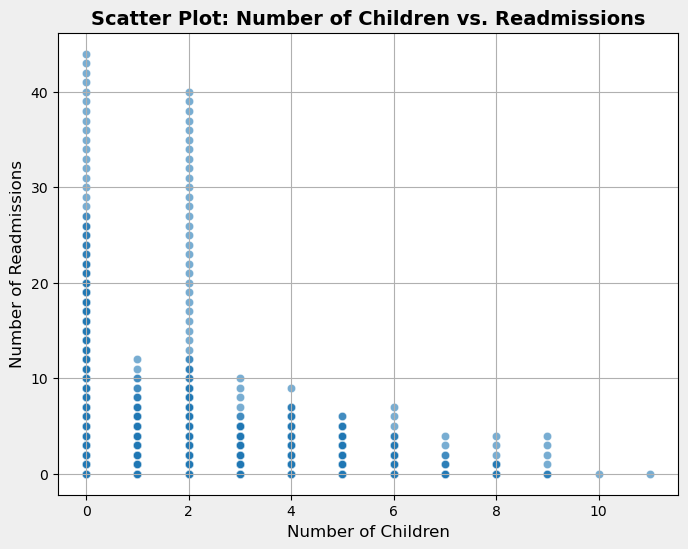

In [10]:
#עדין על ילדים פשוט עם קורולציה 
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf

# קביעת נתיב לקובץ הנתונים
project_root = os.getcwd()
output_dir = os.path.join(project_root, "Statistical tests_Updates", "Children_vs_Readmission")
os.makedirs(output_dir, exist_ok=True)
input_file = os.path.join(project_root, "Update 1 - Gender", "df_with_readmission_flags.xlsx")

# קריאה לקובץ האקסל
df = pd.read_excel(input_file)

# בדיקת נתונים חסרים
df = df.dropna(subset=["מספר ילדים", "מספר אשפוז חוזר"])

# שינוי שמות העמודות לאנגלית כדי למנוע שגיאות
df = df.rename(columns={"מספר ילדים": "num_children", "מספר אשפוז חוזר": "num_readmissions"})

# חישוב מתאם ספירמן בין מספר הילדים למספר האשפוזים
spearman_corr, p_value_spearman = stats.spearmanr(df["num_children"], df["num_readmissions"])

# חישוב קורלציה של פירסון
pearson_corr, p_value_pearson = stats.pearsonr(df["num_children"], df["num_readmissions"])

# ביצוע רגרסיה ליניארית לבדוק קשר בין מספר הילדים למספר האשפוזים
model = smf.ols("num_readmissions ~ num_children", data=df).fit()
r2_value = model.rsquared
p_value_regression = model.pvalues["num_children"]

# שמירת הנתונים היבשים לקובץ טקסט
results_text = f"בדיקת קשר בין מספר הילדים לכמות האשפוזים:\n" \
               f"מתאם ספירמן בין מספר הילדים למספר האשפוזים: {spearman_corr:.2f}\n" \
               f"p-Value (Spearman): {p_value_spearman:.5f}\n" \
               f"קורלציית פירסון: {pearson_corr:.2f}\n" \
               f"p-Value (Pearson): {p_value_pearson:.5f}\n" \
               f"רגרסיה ליניארית: R² = {r2_value:.3f}, p-Value = {p_value_regression:.5f}\n"

if p_value_spearman < 0.05:
    results_text += "יש קשר מובהק בין מספר הילדים למספר האשפוזים.\n"
else:
    results_text += "אין קשר מובהק בין מספר הילדים למספר האשפוזים.\n"

if p_value_pearson < 0.05:
    results_text += "יש קורלציה מובהקת לפי פירסון.\n"
else:
    results_text += "אין קורלציה מובהקת לפי פירסון.\n"

results_file = os.path.join(output_dir, "Children_vs_Readmission_Stats.txt")
with open(results_file, "w", encoding="utf-8") as f:
    f.write(results_text)

# יצירת גרף פיזור להמחשת הקשר בין מספר הילדים למספר האשפוזים
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["num_children"], y=df["num_readmissions"], alpha=0.6, color="#1f77b4")
plt.xlabel("Number of Children", fontsize=12)
plt.ylabel("Number of Readmissions", fontsize=12)
plt.title("Scatter Plot: Number of Children vs. Readmissions", fontsize=14, fontweight='bold')
plt.grid(True)

# שינוי צבע הרקע של הגרף
plt.gcf().set_facecolor('#efefef')

# שמירת הגרף
graph_path = os.path.join(output_dir, "Children_vs_Readmission_Scatterplot.png")
plt.savefig(graph_path, format='png', bbox_inches='tight')
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


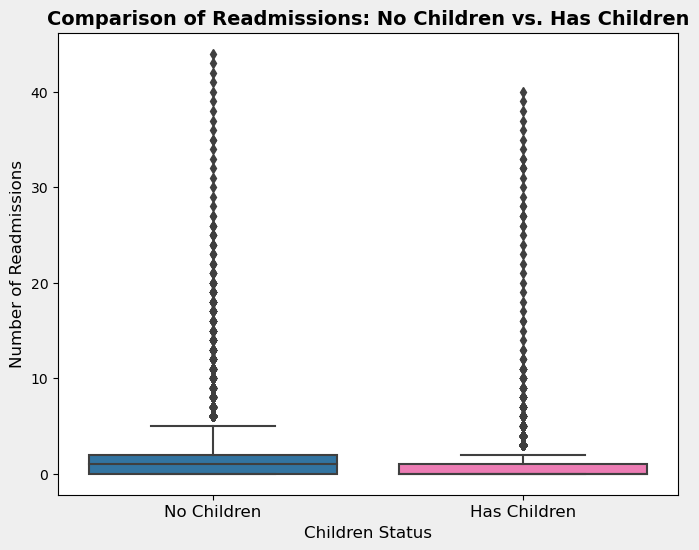

In [51]:
# קביעת הנתיב של תיקיית העבודה הנוכחית
project_root = os.getcwd()
output_dir = os.path.join(project_root, "Statistical tests_Updates", "Children_vs_Readmission")
os.makedirs(output_dir, exist_ok=True)
input_file = os.path.join(project_root, "Update 1 - Gender", "df_with_readmission_count_fixed.xlsx")

# קריאה לקובץ האקסל
df = pd.read_excel(input_file)

# שינוי שמות העמודות לאנגלית כדי למנוע שגיאות
df = df.rename(columns={"מספר ילדים": "num_children", "מספר אשפוז חוזר": "num_readmissions"})

# בדיקת נתונים חסרים
df = df.dropna(subset=["num_children", "num_readmissions"])

# הפרדת הקבוצות
group_no_children = df[df["num_children"] == 0]["num_readmissions"]
group_with_children = df[df["num_children"] > 0]["num_readmissions"]

# בדיקת נורמליות
shapiro_no_children = stats.shapiro(group_no_children)
shapiro_with_children = stats.shapiro(group_with_children)

# בחירת המבחן הסטטיסטי
if shapiro_no_children.pvalue < 0.05 or shapiro_with_children.pvalue < 0.05:
    test_stat, p_value = stats.mannwhitneyu(group_no_children, group_with_children)
    test_used = "Mann-Whitney U"
else:
    test_stat, p_value = stats.ttest_ind(group_no_children, group_with_children, equal_var=False)
    test_used = "T-test (Welch's)"

# שמירת הנתונים היבשים לקובץ טקסט
results_text = f"השוואת ממוצעים בין מטופלים עם 0 ילדים למטופלים עם ילדים:\n" \
               f"שיטה: {test_used}\n" \
               f"סטטיסטיקה: {test_stat:.2f}\n" \
               f"p-Value: {p_value:.5f}\n"
if p_value < 0.05:
    results_text += "יש הבדל מובהק סטטיסטית במספר האשפוזים בין קבוצות המטופלים."
else:
    results_text += "אין הבדל מובהק סטטיסטית במספר האשפוזים בין הקבוצות."

results_file = os.path.join(output_dir, "Children_vs_Readmission_GroupComparison.txt")
with open(results_file, "w", encoding="utf-8") as f:
    f.write(results_text)

# יצירת גרף קופסה להשוואת ההתפלגות בין הקבוצות
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["num_children"] > 0, y=df["num_readmissions"], palette=["#1f77b4", "#ff69b4"])
plt.xticks([0, 1], ["No Children", "Has Children"], fontsize=12)
plt.xlabel("Children Status", fontsize=12)
plt.ylabel("Number of Readmissions", fontsize=12)
plt.title("Comparison of Readmissions: No Children vs. Has Children", fontsize=14, fontweight='bold')

# שינוי צבע הרקע של הגרף
plt.gcf().set_facecolor('#efefef')

# שמירת הגרף
graph_path = os.path.join(output_dir, "Children_vs_Readmission_Boxplot.png")
plt.savefig(graph_path, format='png', bbox_inches='tight')
plt.show()


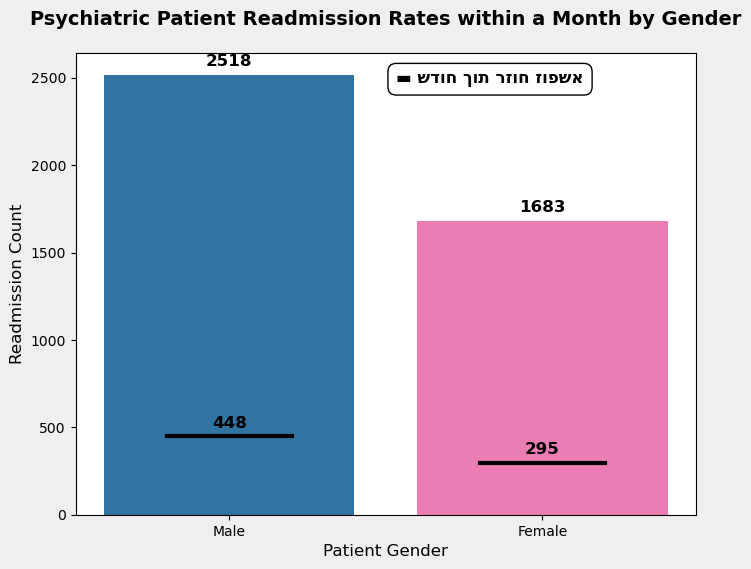

In [2]:
#חזרו לאשפוז תוך חודש - אישה/גבר
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# קביעת נתיב לקובץ הנתונים
project_root = os.getcwd()
output_dir = os.path.join(project_root, "Statistical tests_Updates", "Gender_vs_Readmission")
os.makedirs(output_dir, exist_ok=True)
input_file = os.path.join(project_root, "Update 1 - Gender", "df_with_readmission_flags.xlsx")

# קריאת הנתונים
df = pd.read_excel(input_file)

# ספירת סך כל המטופלים/ות לפי מגדר
total_patients = df.groupby("נקבה")["מספר מטופל רנדומלי"].nunique()

# ספירת המטופלים/ות שחזרו לאשפוז תוך חודש
readmitted_within_month = df[df["חזר לאשפוז תוך חודש"] == 1].groupby("נקבה")["מספר מטופל רנדומלי"].nunique()

# יצירת גרף עמודות
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=["Male", "Female"], y=total_patients, palette=["#1f77b4", "#ff69b4"])

# הוספת קווים שחורים שמייצגים את כמות האשפוזים החוזרים תוך חודש
for i, (total, readmit) in enumerate(zip(total_patients, readmitted_within_month)):
    plt.text(i, total + 50, f"{total}", ha='center', fontsize=12, fontweight='bold')
    plt.text(i, readmit + 50, f"{readmit}", ha='center', fontsize=12, fontweight='bold', color='black')
    plt.plot([i - 0.2, i + 0.2], [readmit, readmit], color='black', linewidth=3)

# הוספת מקרא שמציין שהקו מסמל אשפוז חוזר בפינה הימנית העליונה
plt.figtext(0.76, 0.83, "▬ שדוח ךות רזוח זופשא", fontsize=12, fontweight='bold', color='black', ha='right',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# הוספת כותרות
plt.title("Psychiatric Patient Readmission Rates within a Month by Gender", fontsize=14, fontweight='bold', pad=20)
plt.xlabel("Patient Gender", fontsize=12)
plt.ylabel("Readmission Count", fontsize=12)

# שינוי צבע הרקע של הגרף
plt.gcf().set_facecolor('#efefef')

# שמירת הגרף
graph_path = os.path.join(output_dir, "Gender_vs_Readmission_Within_Month.png")
plt.savefig(graph_path, format='png', bbox_inches='tight')
plt.show()



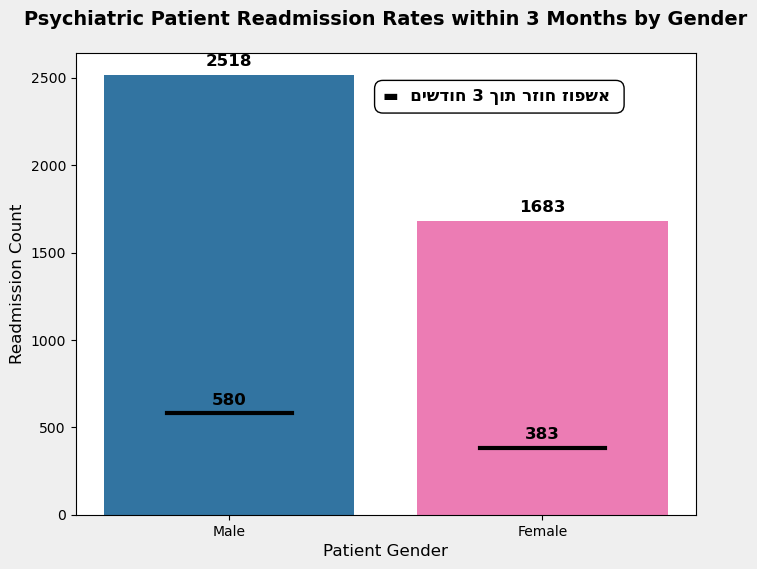

In [8]:
#תוך 3 חודשים גבר/אישה
# חזרו לאשפוז תוך 3 חודשים - אישה/גבר
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# קביעת נתיב לקובץ הנתונים
project_root = os.getcwd()
output_dir = os.path.join(project_root, "Statistical tests_Updates", "Gender_vs_Readmission")
os.makedirs(output_dir, exist_ok=True)
input_file = os.path.join(project_root, "Update 1 - Gender", "df_with_readmission_flags.xlsx")

# קריאת הנתונים
df = pd.read_excel(input_file)

# ספירת סך כל המטופלים/ות לפי מגדר
total_patients = df.groupby("נקבה")["מספר מטופל רנדומלי"].nunique()

# ספירת המטופלים/ות שחזרו לאשפוז תוך 3 חודשים
readmitted_within_3_months = df[df["חזר לאשפוז תוך 3 חודשים"] == 1].groupby("נקבה")["מספר מטופל רנדומלי"].nunique()

# יצירת גרף עמודות
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=["Male", "Female"], y=total_patients, palette=["#1f77b4", "#ff69b4"])

# הוספת קווים שחורים שמייצגים את כמות האשפוזים החוזרים תוך 3 חודשים
for i, (total, readmit) in enumerate(zip(total_patients, readmitted_within_3_months)):
    plt.text(i, total + 50, f"{total}", ha='center', fontsize=12, fontweight='bold')
    plt.text(i, readmit + 50, f"{readmit}", ha='center', fontsize=12, fontweight='bold', color='black')
    plt.plot([i - 0.2, i + 0.2], [readmit, readmit], color='black', linewidth=3)

# הוספת מקרא שמציין שהקו מסמל אשפוז חוזר תוך 3 חודשים בפינה הימנית העליונה
plt.figtext(0.80, 0.80, "▬  םישדוח 3 ךות רזוח זופשא ", fontsize=12, fontweight='bold', color='black', ha='right',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# הוספת כותרות
plt.title("Psychiatric Patient Readmission Rates within 3 Months by Gender", fontsize=14, fontweight='bold', pad=20)
plt.xlabel("Patient Gender", fontsize=12)
plt.ylabel("Readmission Count", fontsize=12)

# שינוי צבע הרקע של הגרף
plt.gcf().set_facecolor('#efefef')

# שמירת הגרף
graph_path = os.path.join(output_dir, "Gender_vs_Readmission_Within_3_Months.png")
plt.savefig(graph_path, format='png', bbox_inches='tight')
plt.show()
